Tree Detection

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image = cv2.imread('/content/tree2.png')

In [6]:
resized_image = cv2.resize(image, (800, 600))  # Resize for faster processing
normalized_image = cv2.normalize(resized_image, None, 0, 255, cv2.NORM_MINMAX)


In [7]:
gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)


In [8]:
edges = cv2.Canny(gray_image, threshold1=30, threshold2=100)


In [9]:
kmeans = KMeans(n_clusters=3)  # Assuming 3 tree species
tree_species_labels = kmeans.fit_predict(edges.reshape(-1, 1))
tree_species_labels = tree_species_labels.reshape(edges.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [10]:
unique_labels, counts = np.unique(tree_species_labels, return_counts=True)


Display the **results**

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Image')

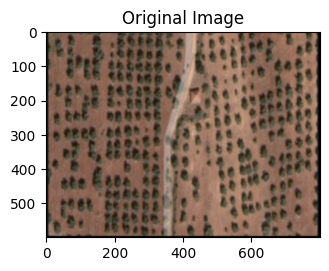

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(resized_image)
plt.title('Original Image')

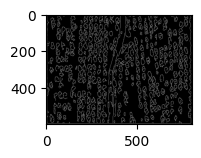

In [13]:
plt.subplot(132)
plt.imshow(edges, cmap='gray')


Text(0.5, 1.0, 'Edge Detection')

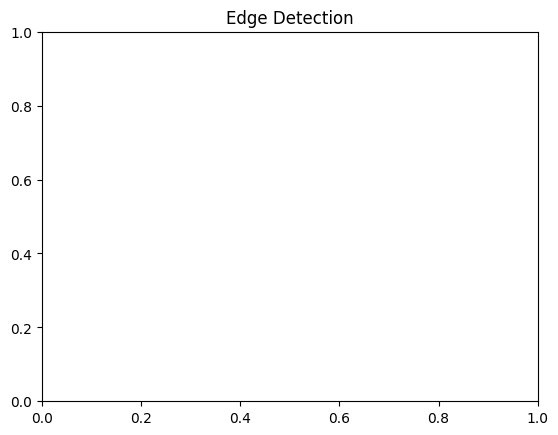

In [14]:
plt.title('Edge Detection')

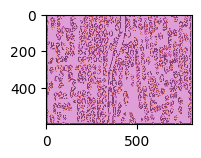

In [15]:
plt.subplot(133)
plt.imshow(tree_species_labels, cmap='tab20b')

Text(0.5, 1.0, 'Tree Species Clustering')

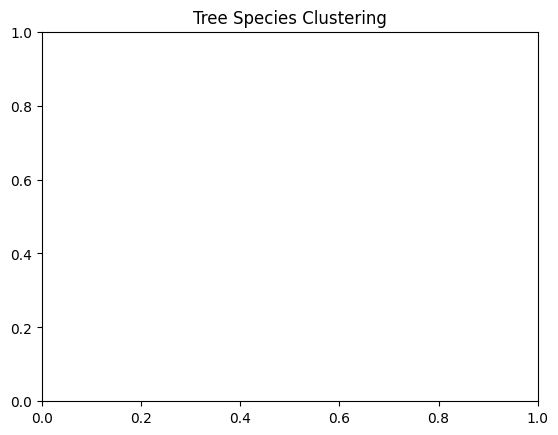

In [16]:
plt.title('Tree Species Clustering')


In [17]:
plt.show()

 Print the tree counts by species

In [18]:
for label, count in zip(unique_labels, counts):
    print(f'Tree Species {label}: {count} trees')

Tree Species 0: 39804 trees
Tree Species 2: 440196 trees


# Step2;- ***harsh***

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [20]:
image = cv2.imread('/content/tree4.jpg')
# using second image

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [22]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [23]:
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)


In [24]:
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [25]:
min_area = 200  # Adjust this threshold based on your image
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]


In [26]:
for contour in filtered_contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(image, center, radius, (0, 255, 0), 2)

In [27]:
num_trees = len(filtered_contours)

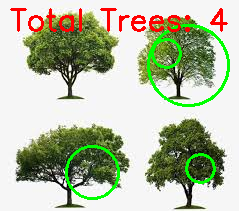

In [28]:
cv2.putText(image, f'Total Trees: {num_trees}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
print(f'Total Trees: {num_trees}')


Total Trees: 4


Accuracy score = very low

its a prototype.....
for more accuracy, we will going to use algorithm. So, please use out next file Tree_detections2